# Prova 1 (2024-1) - Processamento Digital de Sinais I

Professor:
* Carlos Speranza

Aluno:
* João Mário C. I. Lago

In [17]:
!pip install -q dsp-ifsc numpy pandas matplotlib scipy

## Imports

In [18]:
import numpy as np
import scipy as sp
from dsp_ifsc.signal import Signal
from dsp_ifsc.system import System

<hr />

## Questão 1

Demonstrar algebricamente e “verificar” numericamente (Pyhton) se o sistema abaixo é invariante no tempo.

$$
y(n) = x^2(n+1)
$$

### Demonstração Algebrica

Para demonstrar a invariância no tempo, deve-se mostrar que a resposta do sistema a um sinal deslocado no tempo é igual ao sinal deslocado da resposta do sistema.

Seja $y(n) = x^2(n+1)$, então a resposta do sistema a um sinal deslocado no tempo é $y(n-k) = x^2(n-k+1)$.

Vamos calcular a resposta do sistema a um sinal deslocado no tempo.

$$
y(n-k) = x^2(n-k+1) = x^2(n+1-k) = y(n+1-k)
$$

Portanto, o sistema é invariante no tempo.

### Demonstração Numérica

In [19]:
sys = System(lambda x: (x << 1) * (x << 1))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear False
Is Time-Invariant True


<hr />

## Questão 2

Dadas as seguintes sequências finitas $x[n]$ e $h[n]$:

$$
x[n] = n(u[n+3] - u[n-12]) \\
h[n] = n(u[n] - u[n-5])
$$

Encontre $y[n]$ através $y[n] = x[n] * h[n]$ (convolução).
Apresente os gráficos (contendo todas as amostras não-nulas) de $x[n], h[n], y[n]$.

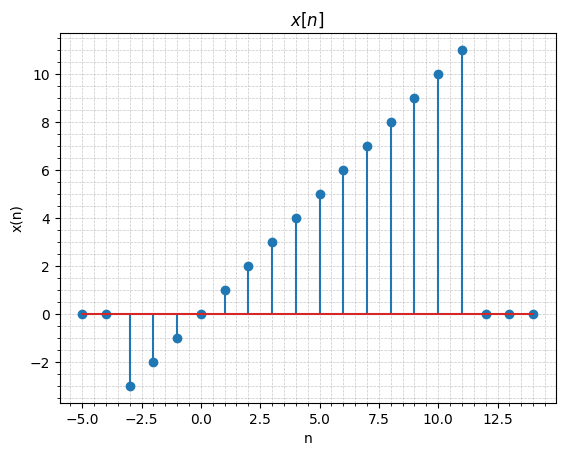

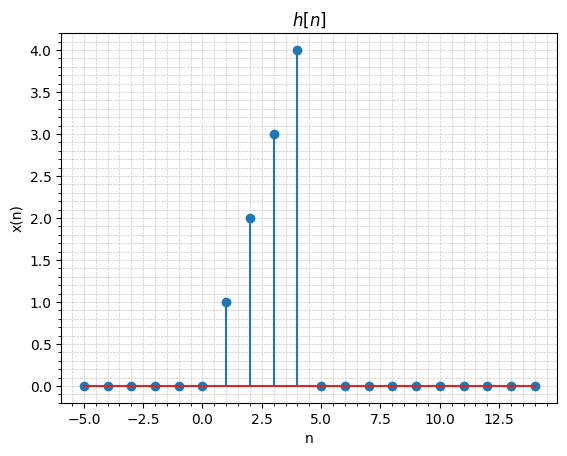

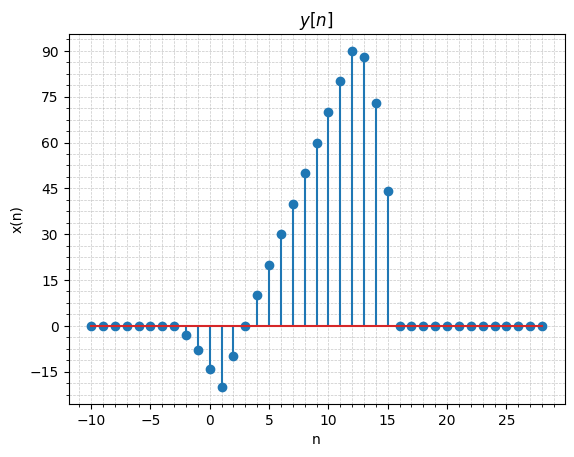

<Axes: title={'center': '$y[n]$'}, xlabel='n', ylabel='x(n)'>

In [20]:
# Define um range N que consigamos visualizar o sinal
n = np.arange(-5, 15)

# Define x e y
x = Signal(n, n) * (Signal.from_step(n, - 3) - Signal.from_step(n, 12))
h = Signal(n, n) * (Signal.from_step(n) - Signal.from_step(n, 5))

# Realiza a convolução
y = x @ h

# Plota os sinais
x.stem(r'$x[n]$')
h.stem(r'$h[n]$')
y.stem(r'$y[n]$')

<hr />

## Questão 3

Considere o sistema LTI (linear invariante no tempo) descrito pela seguinte equação de diferenças a coeficientes constantes:

$$
y[n] = y[n-1] - 0.5x[n-2] - 0.5x[n-1] + x[n] \\
y[n] - y[n-1] = x[n] - 0.5x[n-1] - 0.5x[n-2] \\
$$

### Gráfico da Resposta ao Degrau

Apresente o gráfico da resposta completa (transitório e permanente) do sistema para o salto $x[n] = u[n]$.

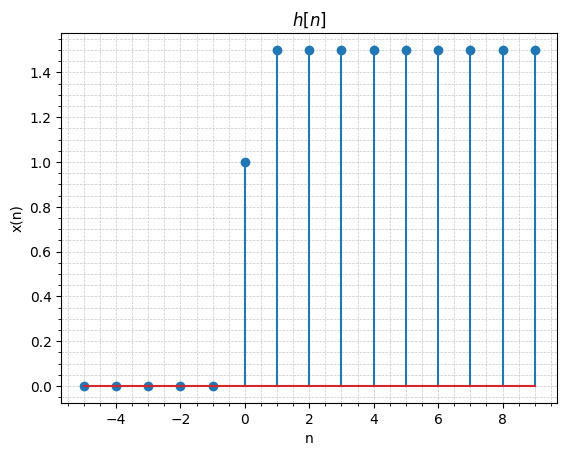

<Axes: title={'center': '$h[n]$'}, xlabel='n', ylabel='x(n)'>

In [21]:
# Y coefficients
a = np.array([1.0,-1.0])
# X coefficients
b = np.array([1.0, -0.5, -0.5])

# Define x como um degrau
n = np.arange(-5, 10)
inp = Signal.from_step(n)

h = sp.signal.lfilter(b, a, inp.x)

step_response = Signal(h, n)
step_response.stem(r'$h[n]$')


### Estimativa do Transitório

Estime quantas amostras demora para ocorrer a estabilização de $y[n]$ (ou quando o módulo do valor do transitório fica menor que 2% do permanente).

#### Resposta

Analisando visualmente o gráfico da resposta ao degrau, é possível perceber que a respostá começa em n = -1 e estabiliza em n = 1, porém isso apenas envolve a transição, em um cenário real precisamos verificar que realmente ocorre a estabilização com mais alguns pontos se repetindo, assim o intervalo ideal seria de n = -3 até n = 3.
Logo, a estabilização ocorre em 6 amostras após n = -3.

<hr />

## Questão 4

Considere um sistema LTI cuja resposta ao impulso é dada por:

$$
h[n] = \{0.2^n + (-0.6)^{n+1}\} u[n]
$$

Utilizando a DTFT (Transformada de Fourier a tempo discreto) encontre a equação e mostre o gráfico da resposta em frequência do sistema (magnitude E fase).
Depois encontre a equação e mostre o gráfico da saída do sistema $y[n]$ em regime permanente com a entrada dada por:

$$
x[n] = cos(0.3\pi n + \frac{\pi}{2})
$$

Dica: verifique sua resposta parcial comparando com a resposta completa (transitório e permanente).

### Equação do gráfico da resposta em frequência

A resposta em frequência é dada pela DTFT da resposta ao impulso, logo:

$$
H(e^{j\omega}) = \sum_{n=-\infty}^{\infty} h[n] e^{-j\omega n}
$$

#### Implementação da DTFT

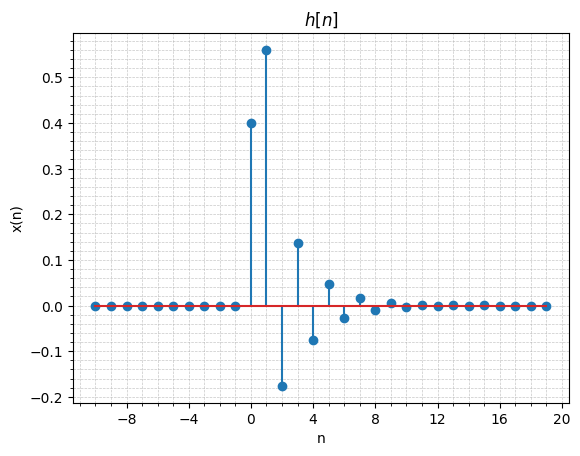

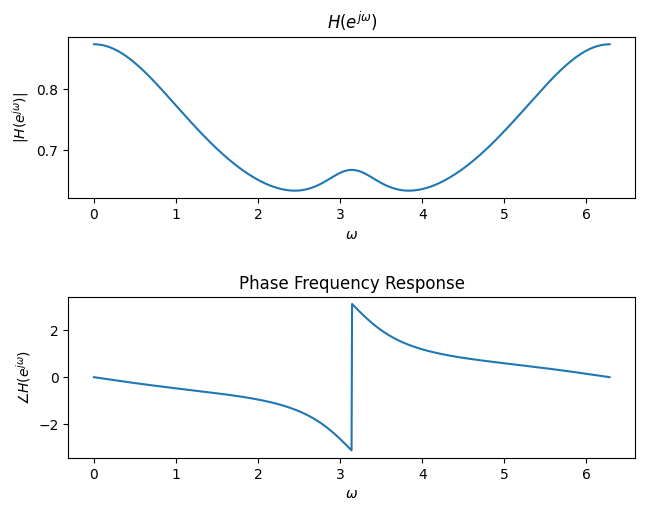

In [22]:
# Define n e h
n = np.arange(-10, 20)
h = Signal((0.2 ** n) + ((-0.6) ** (n + 1)) ,n) * Signal.from_step(n)

# Mostra h
_ = h.stem(r'$h[n]$')

# Calcula a resposta em frequência
w = np.linspace(0.0, 2 * np.pi, 1000)
H = h.freqz(w)

# Plota a resposta em frequência
_ = H.plot_as_frequency_response(r'$H(e^{j\omega})$')

### Equação do gráfico da saída em regime permanente

A saída em regime permanente é dada pela convolução da entrada com a resposta ao impulso, logo:

$$
y[n] = x[n] * h[n] \\
y[n] = cos(0.3\pi n + \frac{\pi}{2}) * \{0.2^n + (-0.6)^{n+1}\} u[n]
$$

#### Implementação da convolução

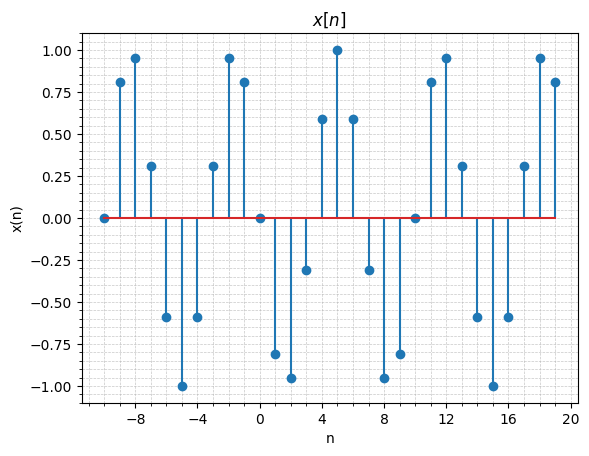

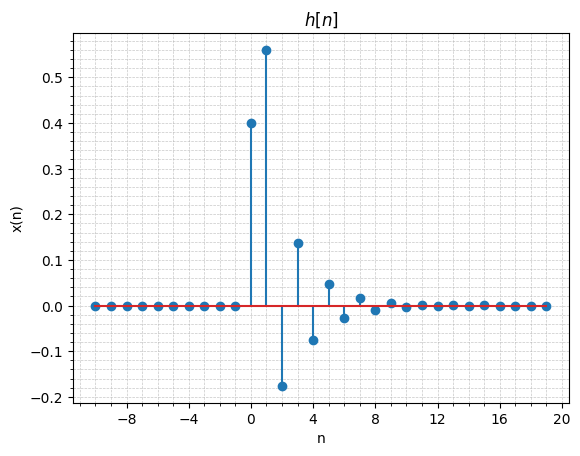

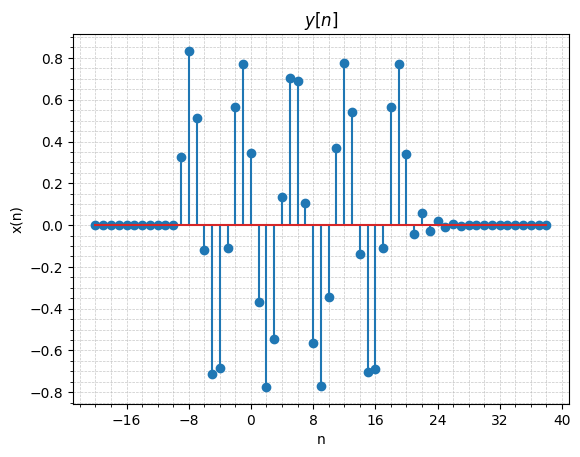

In [23]:
n = np.arange(-10, 20)
h = Signal((0.2 ** n) + ((-0.6) ** (n + 1)) ,n) * Signal.from_step(n)
x = Signal.from_cosine(0.3 * np.pi, n, np.pi / 2)

# Mostra x e h
_ = x.stem(r'$x[n]$')
_ = h.stem(r'$h[n]$')

# Realiza a convolução
y = x @ h

# Mostra y
_ = y.stem(r'$y[n]$')